In [15]:
# Import thư viện cần thiết
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


# Đọc dữ liệu
df = pd.read_csv('ai_job_dataset.csv')

# Xem 5 dòng đầu
df.head()


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


**TỔNG QUAN DỮ LIỆU**

In [16]:
# Kích thước dữ liệu
print("Shape:", df.shape)

# Thông tin các cột
df.info()

# Kiểm tra dữ liệu thiếu
df.isnull().sum()

# Kiểm tra dữ liệu trùng
df.duplicated().sum()


Shape: (15000, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date       

0

**KHÁM PHÁ BIẾN (CỘT)**

In [17]:
# Phân loại cột
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical columns:", cat_cols.tolist())
print("Numerical columns:", num_cols.tolist())


# Tạo cột Remote_Type từ remote_ratio
def classify_remote(ratio):
    if ratio == 0:
        return 'On-Site'
    elif ratio == 100:
        return 'Remote'
    else:
        return 'Hybrid'

df['remote_type'] = df['remote_ratio'].apply(classify_remote)

# Kiểm tra kết quả
print(df[['employment_type', 'company_size', 'education_required', 'remote_type']].drop_duplicates().head())
print("Số dòng:", len(df))

Categorical columns: ['job_id', 'job_title', 'salary_currency', 'experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence', 'required_skills', 'education_required', 'industry', 'posting_date', 'application_deadline', 'company_name']
Numerical columns: ['salary_usd', 'remote_ratio', 'years_experience', 'job_description_length', 'benefits_score']
  employment_type company_size education_required remote_type
0              CT            M           Bachelor      Hybrid
1              CT            M             Master      Remote
2              FL            L          Associate     On-Site
3              FL            M                PhD      Hybrid
4              PT            S             Master      Remote
Số dòng: 15000


**XỬ LÝ DỮ LIỆU THIẾU**

In [21]:
# Tỷ lệ % missing trên mỗi cột
missing_percent = df.isnull().mean() * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

# Ví dụ: điền giá trị thiếu
df['company_location'].fillna('Unknown', inplace=True)
df.dropna(subset=['salary_usd'], inplace=True)  # nếu cột này quan trọng


Series([], dtype: float64)


In [22]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,remote_type
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,Hybrid
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,Remote
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,On-Site
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,Hybrid
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,Remote


**TRỰC QUAN HÓA DỮ LIỆU**

C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


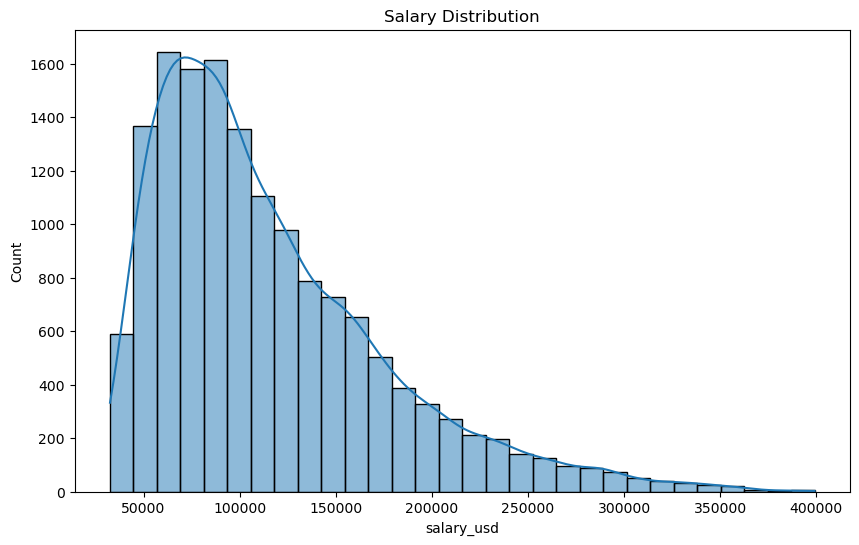

In [23]:
# Phân phối lương
plt.figure(figsize=(10,6))
sns.histplot(df['salary_usd'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_2752\3825932288.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='employment_type', y='salary_usd', ci=None)


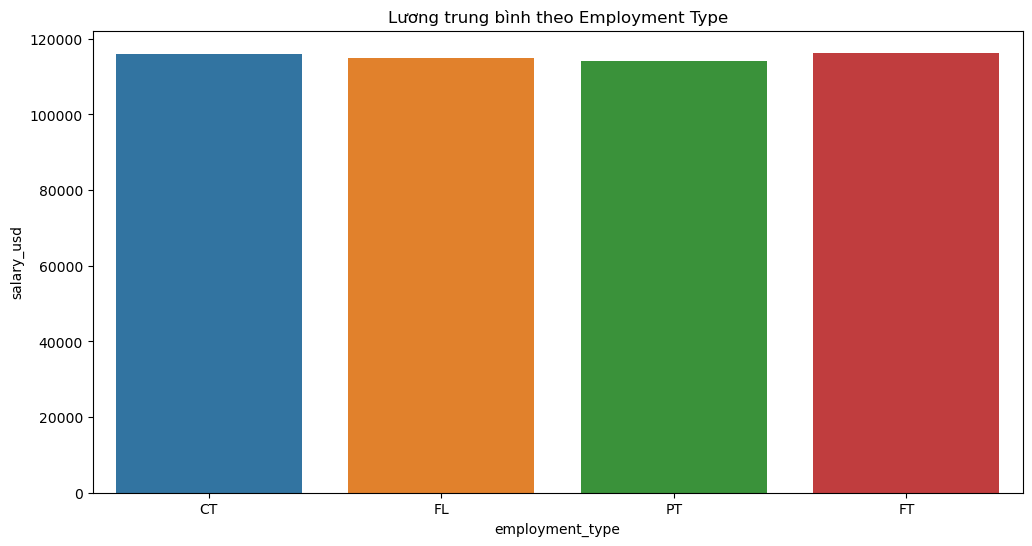

In [24]:
# Lương trung bình theo vị trí công việc
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='employment_type', y='salary_usd', ci=None)
plt.title('Lương trung bình theo Employment Type')
plt.show()


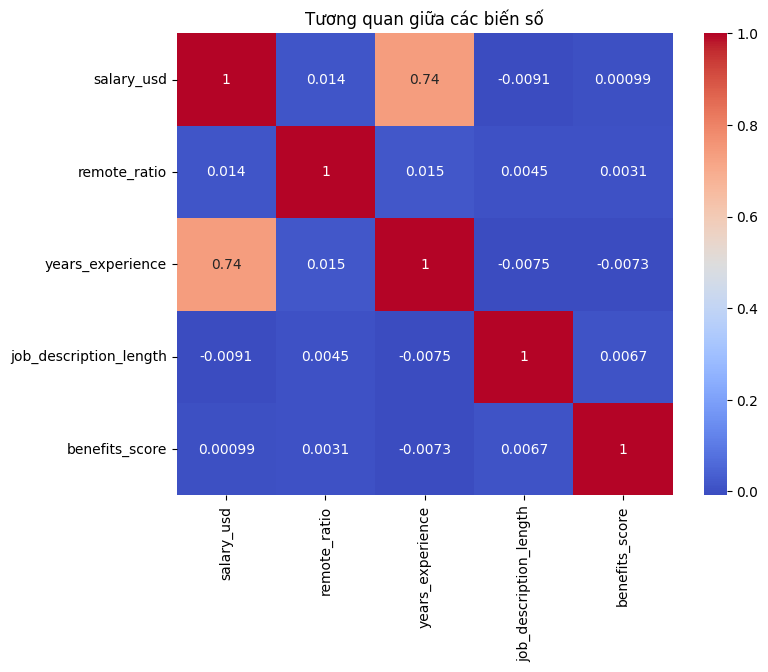

In [ ]:
# Biểu đồ heatmap và tương quan
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Tương quan giữa các biến số')
plt.show()


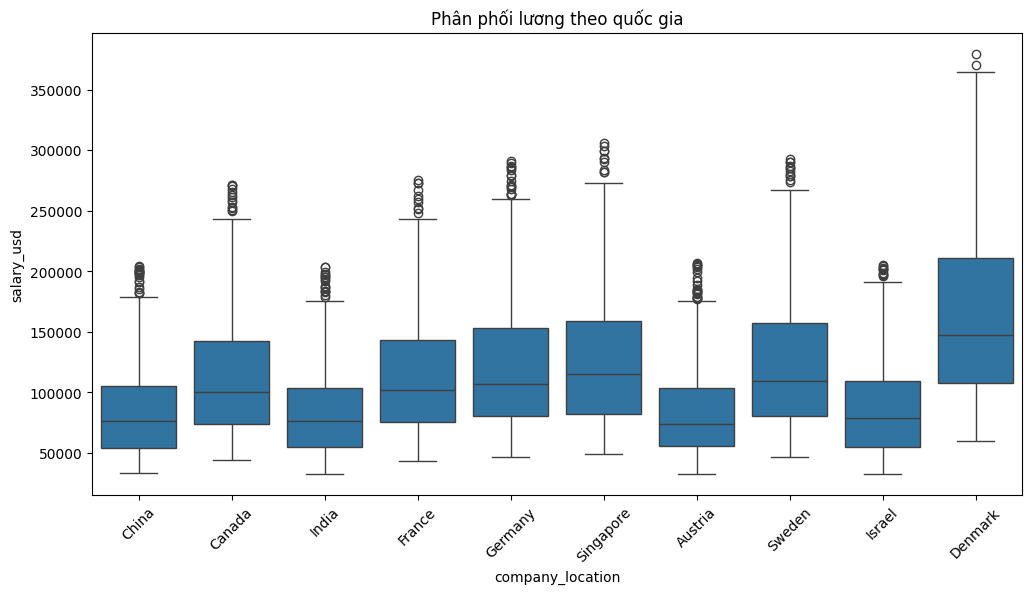

In [ ]:
# Phân phối lương theo quốc gia
top_countries = df['company_location'].value_counts().head(10).index
df_top = df[df['company_location'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_top, x='company_location', y='salary_usd')
plt.title('Phân phối lương theo quốc gia')
plt.xticks(rotation=45)
plt.show()


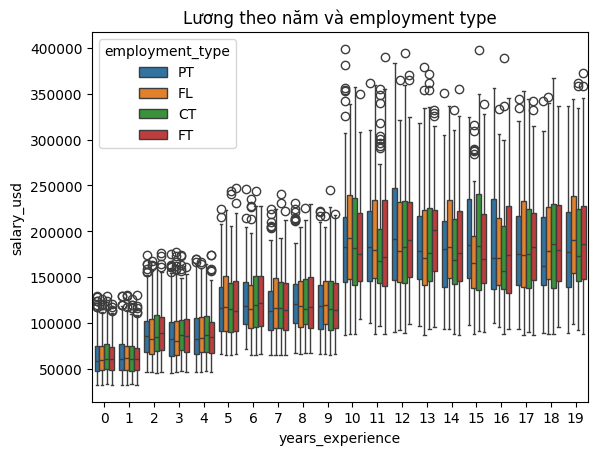

In [ ]:
# Lương theo loại hình làm việc
sns.boxplot(data=df, x='years_experience', y='salary_usd', hue='employment_type')
plt.title('Lương theo năm và employment type')
plt.show()


In [ ]:
# Xuất file CSV đã xử lý
df.to_csv('ai_job_dataset_cleaned.csv', index=False)